# Example: REV analysis for PNM characteristics.

This example demonstrates how to perform REV analysis for the characteristics of pore-network model (PNM) extracted from 3d binary image.

Here, we perform REV analysis for pore number, normalized over the subcube volume (total number of voxels), and pore radius distribution.

In [1]:
from revanalyzer import REVAnalyzer
from revanalyzer.generators import generate_PNM 
from revanalyzer.vectorizers import HistVectorizer
from revanalyzer.metrics import PoreNumber, PoreRadius

In [2]:
#initislization

image = 'ceramic300' #binary file of 'uint8' type representing 3D image.
size = (300, 300, 300) #size of image in x, y and z directions
n_steps = 6 # number of subsamples selection steps
sREV_max_step = 4 #maximal step for which sREV analysis is performed.
datadir = 'data' # path to folder containing image, default: 'data'
outputdir = 'output' # path to outputfolder containig image, default: 'output'

exe_path = '/home/azubov/pnm_extractor/pore-network-extraction/build_release/bin/extractor_example' 
#path to PNM-exractor exe file

n_threads = 32 #number of threads, default: 1
resolution = 1. #resolution of studied sample (unitless), default: 1.
length_unit_type = 'M' #units of resolution. Can be 'NM', 'UM', 'MM' and 'M', default: 'M'
                       #Note, that default 'resolution' and 'length_unit_type' values ensure output pore and throat
                       #radii values in voxel units.
direction = 'z' #could be 'x', 'y', or 'z'. If PNM extractor is used to generate PNM characteristic only 
                #but not permeability, the results do not depend on the direction value; defautlt: 'z'.
show_time = True #default: False. Added to monitor time cost for large images.

metric = PoreNumber(exe_path = exe_path, n_threads = n_threads, resolution = resolution,
                    length_unit_type = length_unit_type, direction = direction, show_time = show_time)
analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [3]:
#generate metric data for all the subcubes
analyzer.generate()

---PNM extractor run time is 81.39594745635986 seconds ---


In [4]:
#fix thresholds and analyze generated data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [5]:
#get mean, std and normed std values for different cut sizes
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std)

#get sREV and dREV sizes
print(analyzer.sREV_size_1)
print(analyzer.dREV_size_1)
print(analyzer.dREV_size_2)


{1: 0.00011377777777777778, 2: 7.411111111111111e-05, 3: 6.475720164609054e-05, 4: 6.190277777777778e-05, 5: 6.1248e-05, 6: 5.8222222222222224e-05}
{1: 2.317938632960942e-05, 2: 1.1169844766099728e-05, 3: 4.0724692353969254e-06, 4: 1.5565473029024343e-06}
{1: 0.20372507516258279, 2: 0.15071754556956155, 3: 0.06288828318514571, 4: 0.025145031592769863}
100
100
150


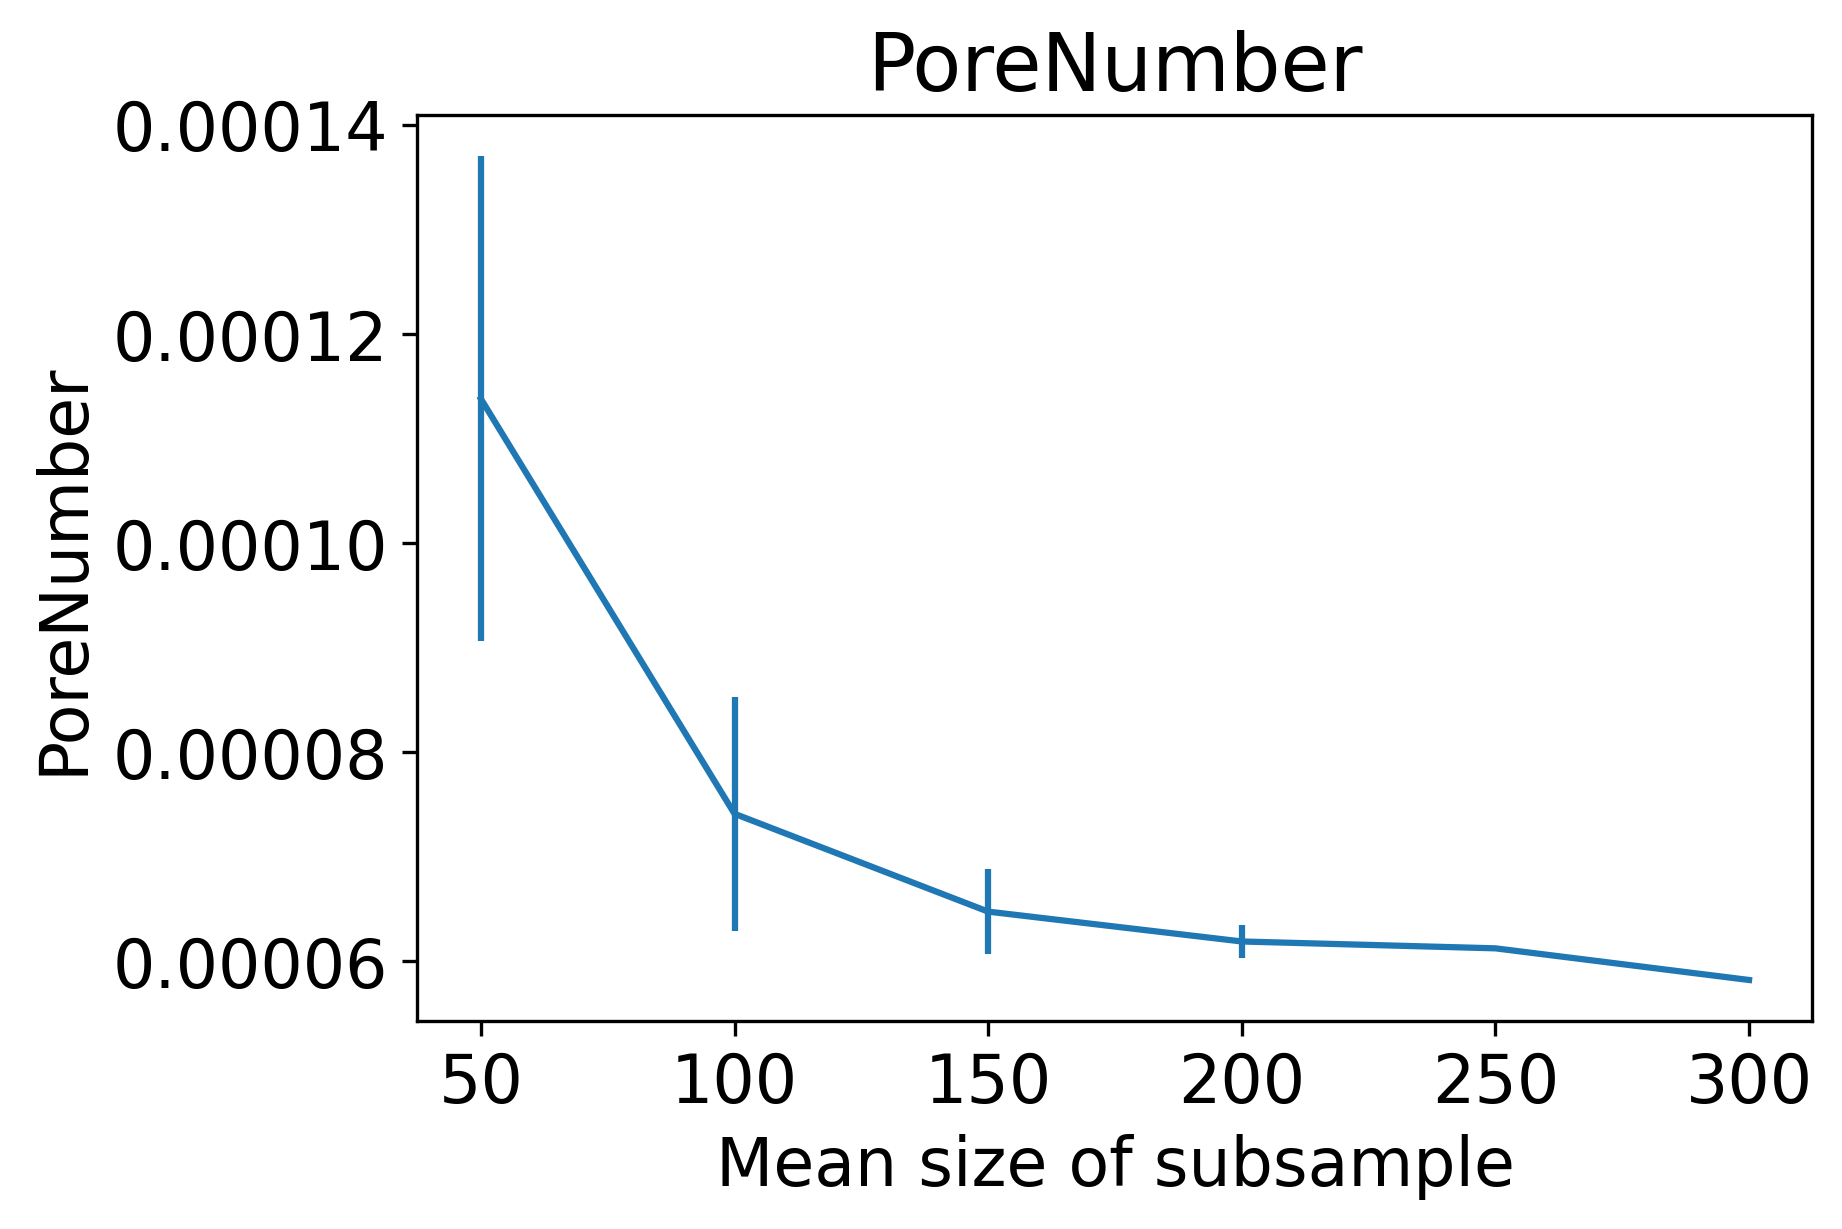

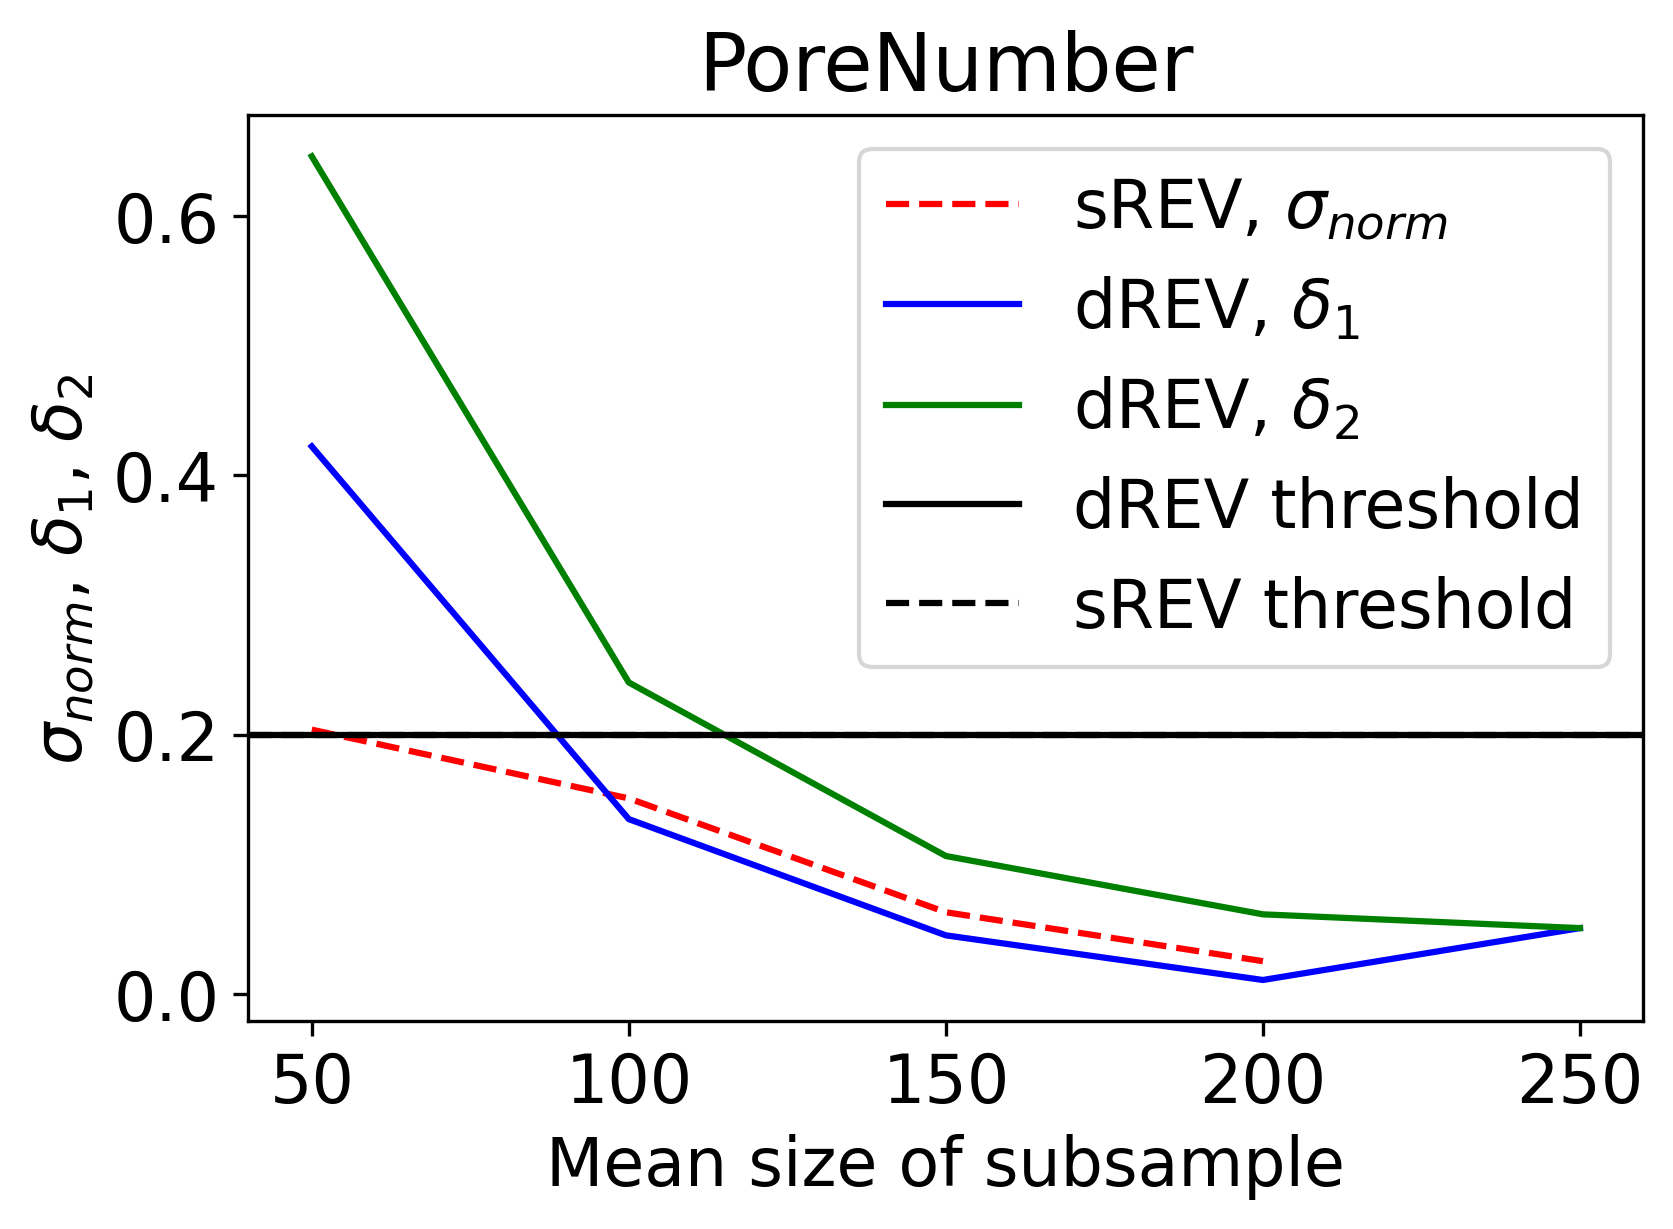

In [6]:
analyzer.show_results()

In [7]:
#initizialization

norm = 2  #Norm of vectors used in REV analysis. The same, as parameter 'ord' in numpy.linalg.norm function; 
          #default: 2.
factor = 1 #Factor defines how many bins are in linear size of one voxel, default: 1.

vectorizer = HistVectorizer(factor = factor, norm = norm)

metric = PoreRadius(vectorizer = vectorizer, exe_path = exe_path, n_threads = n_threads, show_time = True)

analyzer = REVAnalyzer(metric = metric, image = image, size = size, n_steps = n_steps, sREV_max_step = sREV_max_step,
                       datadir = datadir, outputdir = outputdir)

In [8]:
#generate metric data for all the subcubes
analyzer.generate()

In [9]:
#read the metric values for the specific subcube:
step = 3
cut_id = 5
value = analyzer.read(step, cut_id)
print(value)

[0.91709882 1.50459933 0.50101209 3.51639318 4.42031288 4.10283804
 4.52373838 4.62294197 5.35810757 4.91116095 5.00332355 4.62283373
 6.53486919 5.35884714 5.44500303 5.69436312 7.34933281 7.15468979
 6.60681391 6.08909702 0.50146192 5.69375277 5.27107143 6.53510618
 4.10274649 5.93346262 5.1837945  6.1657238  3.11985946 8.76741886
 6.24160337 5.93370485 3.76131248 4.10240984 5.85515547 1.50602031
 4.62247944 3.7613833  4.91108704 3.99225998 7.78875399 4.52284813
 7.22021246 6.01270437 3.11913896 6.31619453 4.90965748 8.71326733
 5.69483519 5.52887535 5.35919046 5.93510056 5.69422531 6.81630754
 4.90898228 6.24119568 4.91063118 3.63954663 2.5121932  5.69413137
 7.021348   4.719944   6.88562298 5.18336058 6.01277781 6.53547096
 4.10259438 4.52232981 5.69458675 5.93459225 4.91157198 5.85585642
 3.99205065 4.9109664  7.60283422 7.6660881  6.53421545 5.27220249
 6.6774087  7.08803606 5.6953702  7.41503286 4.52308989 4.5219593
 8.14761162 5.93552685 6.16641283 8.49058437 6.16648388 0.50011

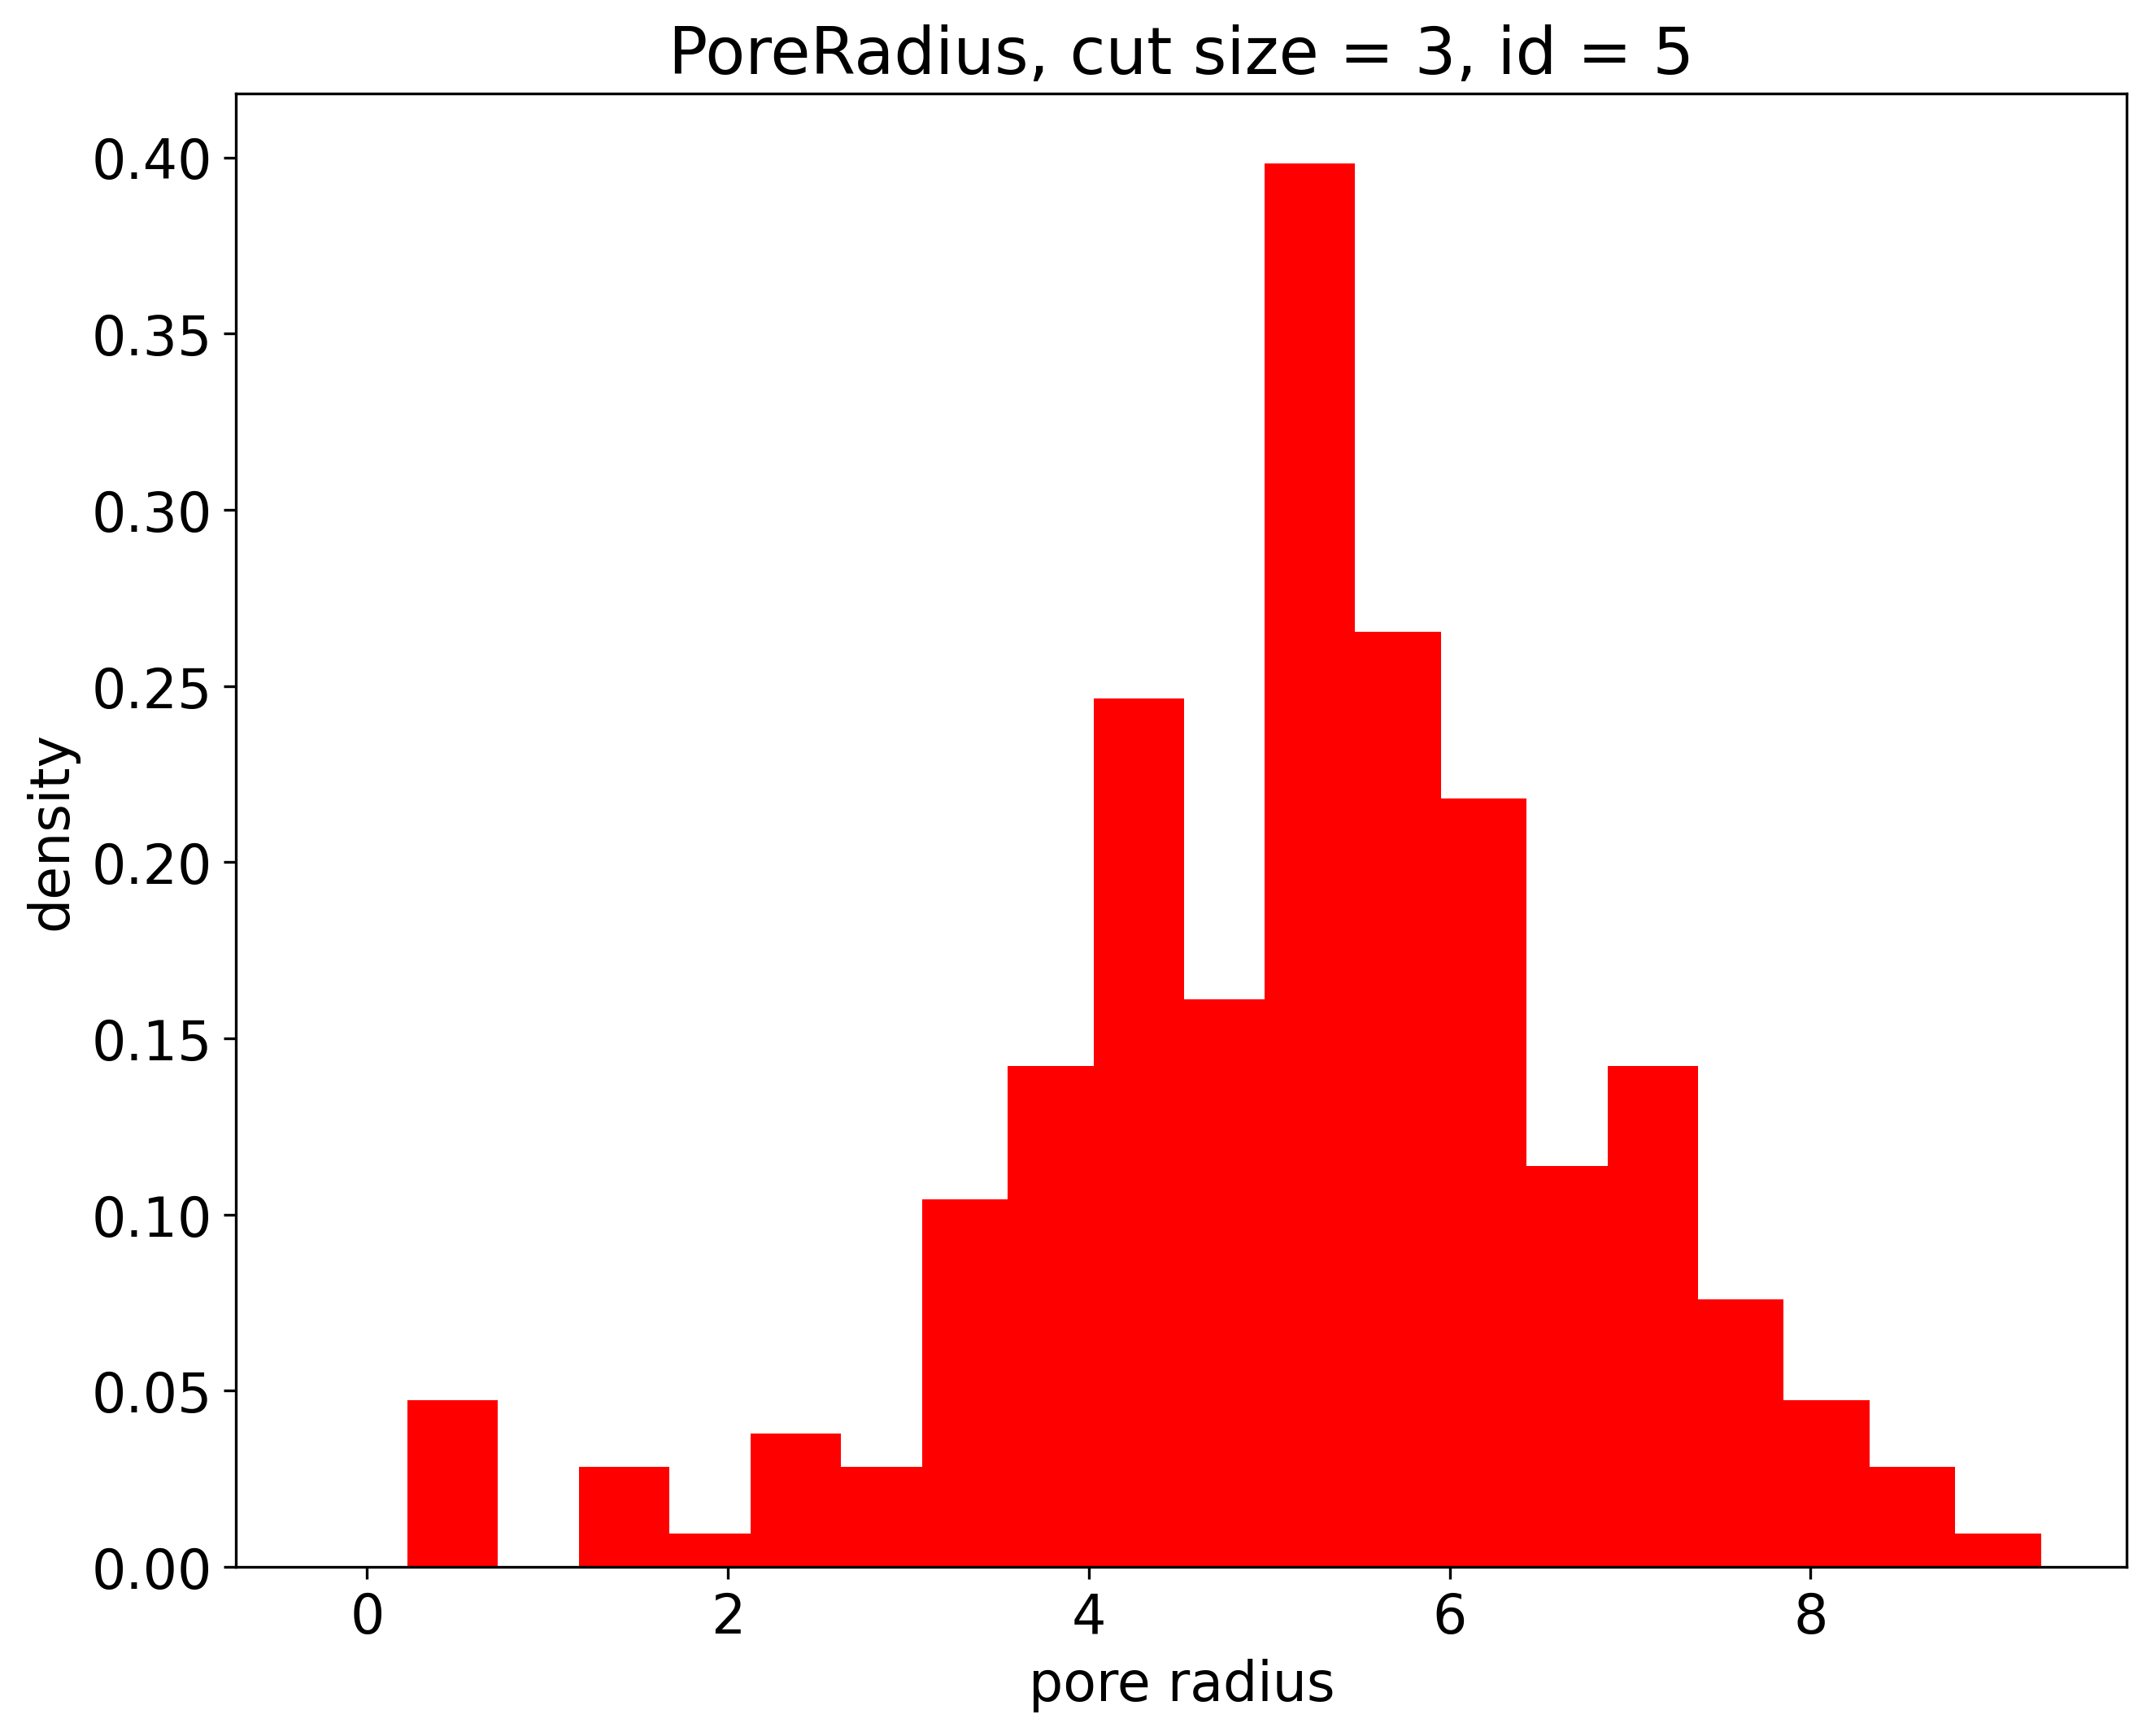

In [10]:
#Visualize thec distribuiton of this metric for a given subcube:
nbins = 20 #number of bins in a histogram
analyzer.show(step, cut_id, nbins = nbins)

In [11]:
#vectorization
analyzer.vectorize()

In [12]:
#fix thresholds and analyze vectorized data
analyzer.analyze(dREV_threshold = 0.2, sREV_threshold = 0.2)

In [13]:
print(analyzer.metric_mean)
print(analyzer.metric_std)
print(analyzer.metric_normed_std_1)
print(analyzer.metric_normed_std_2)

{1: 0.6821056342105013, 2: 0.4243869401098522, 3: 0.2321199553411282, 4: 0.11755512896300198, 5: 0.10942251910883252}
{1: 0.16990421871507658, 2: 0.11078289041639326, 3: 0.07195711127434232, 4: 0.04343360353232499}
{1: 0.8495210935753829, 2: 0.5539144520819663, 3: 0.35978555637171156, 4: 0.21716801766162494}
{1: 0.24908783946892787, 2: 0.2610421762453793, 3: 0.3099996774021117, 4: 0.21716801766162494}


In [14]:
#get dREV and sREV size estimation
print(analyzer.dREV_size_1)
print(analyzer.sREV_size_1)
print(analyzer.sREV_size_2)

200
None
None


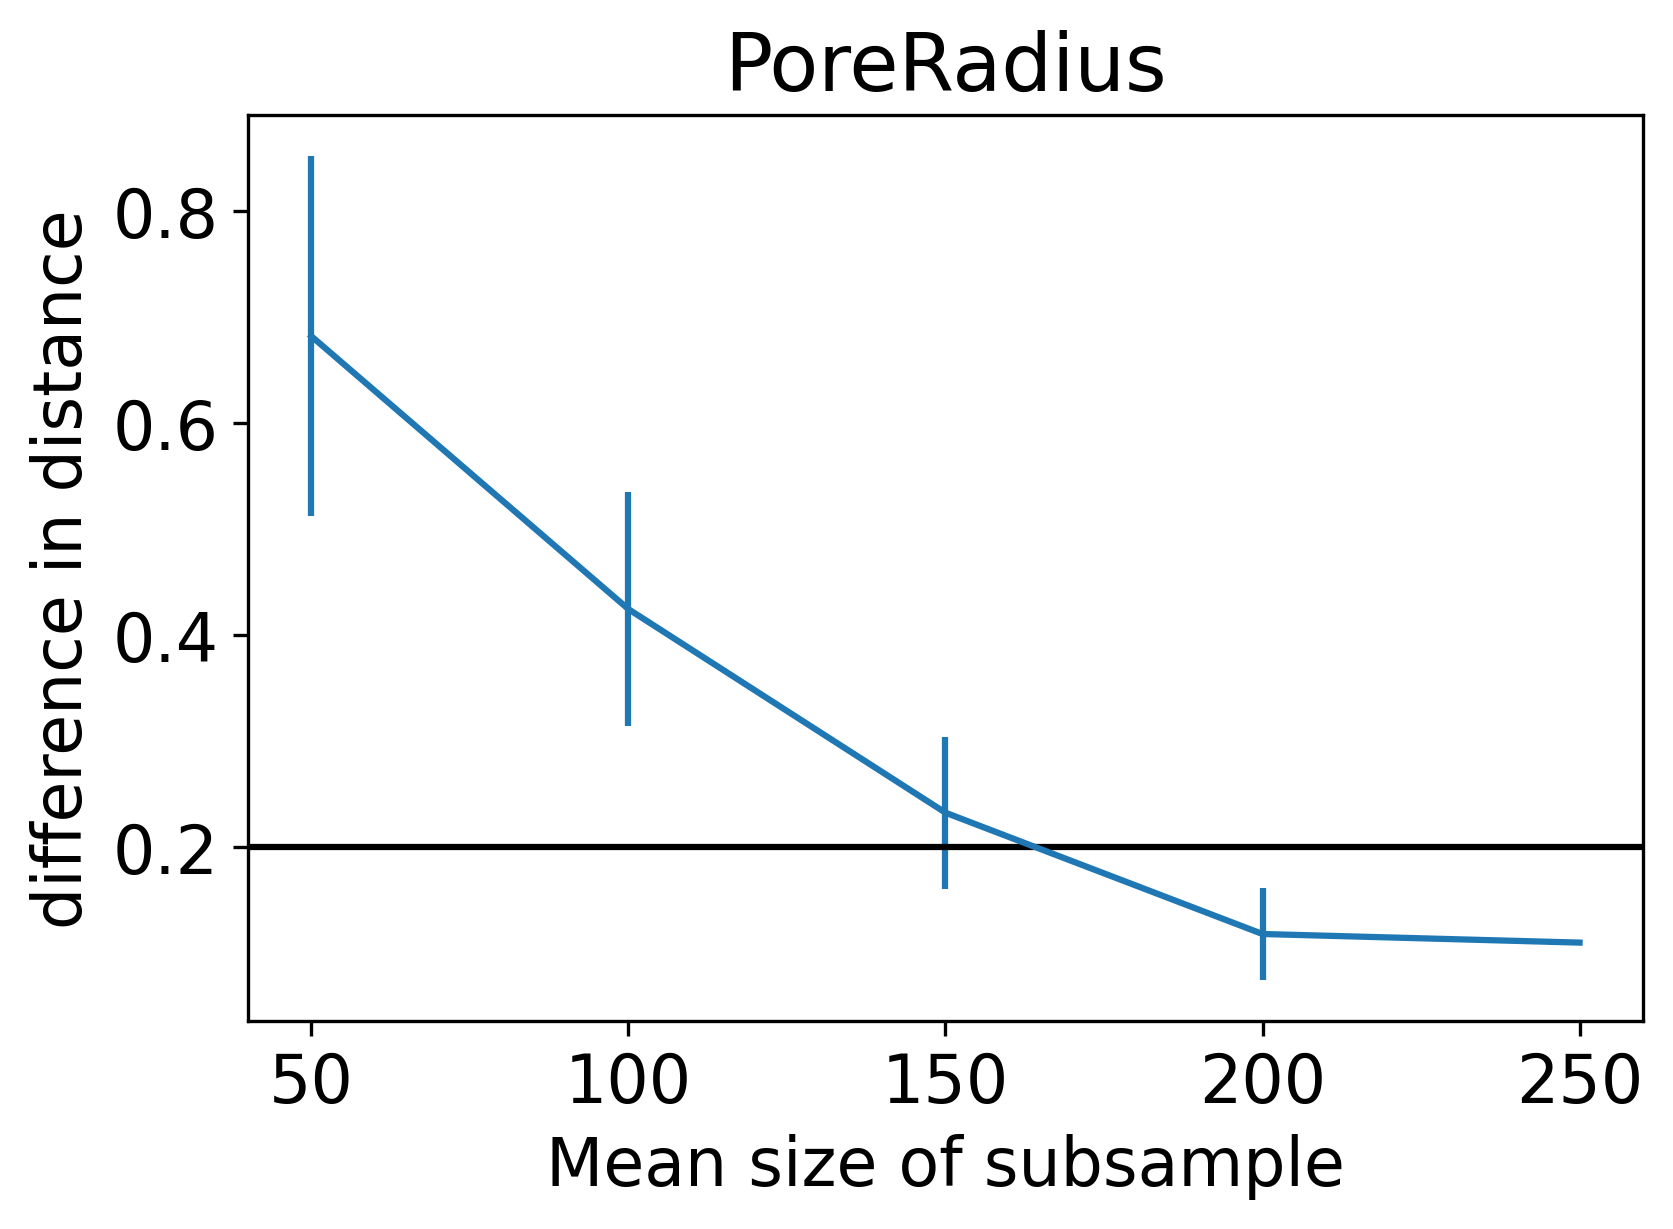

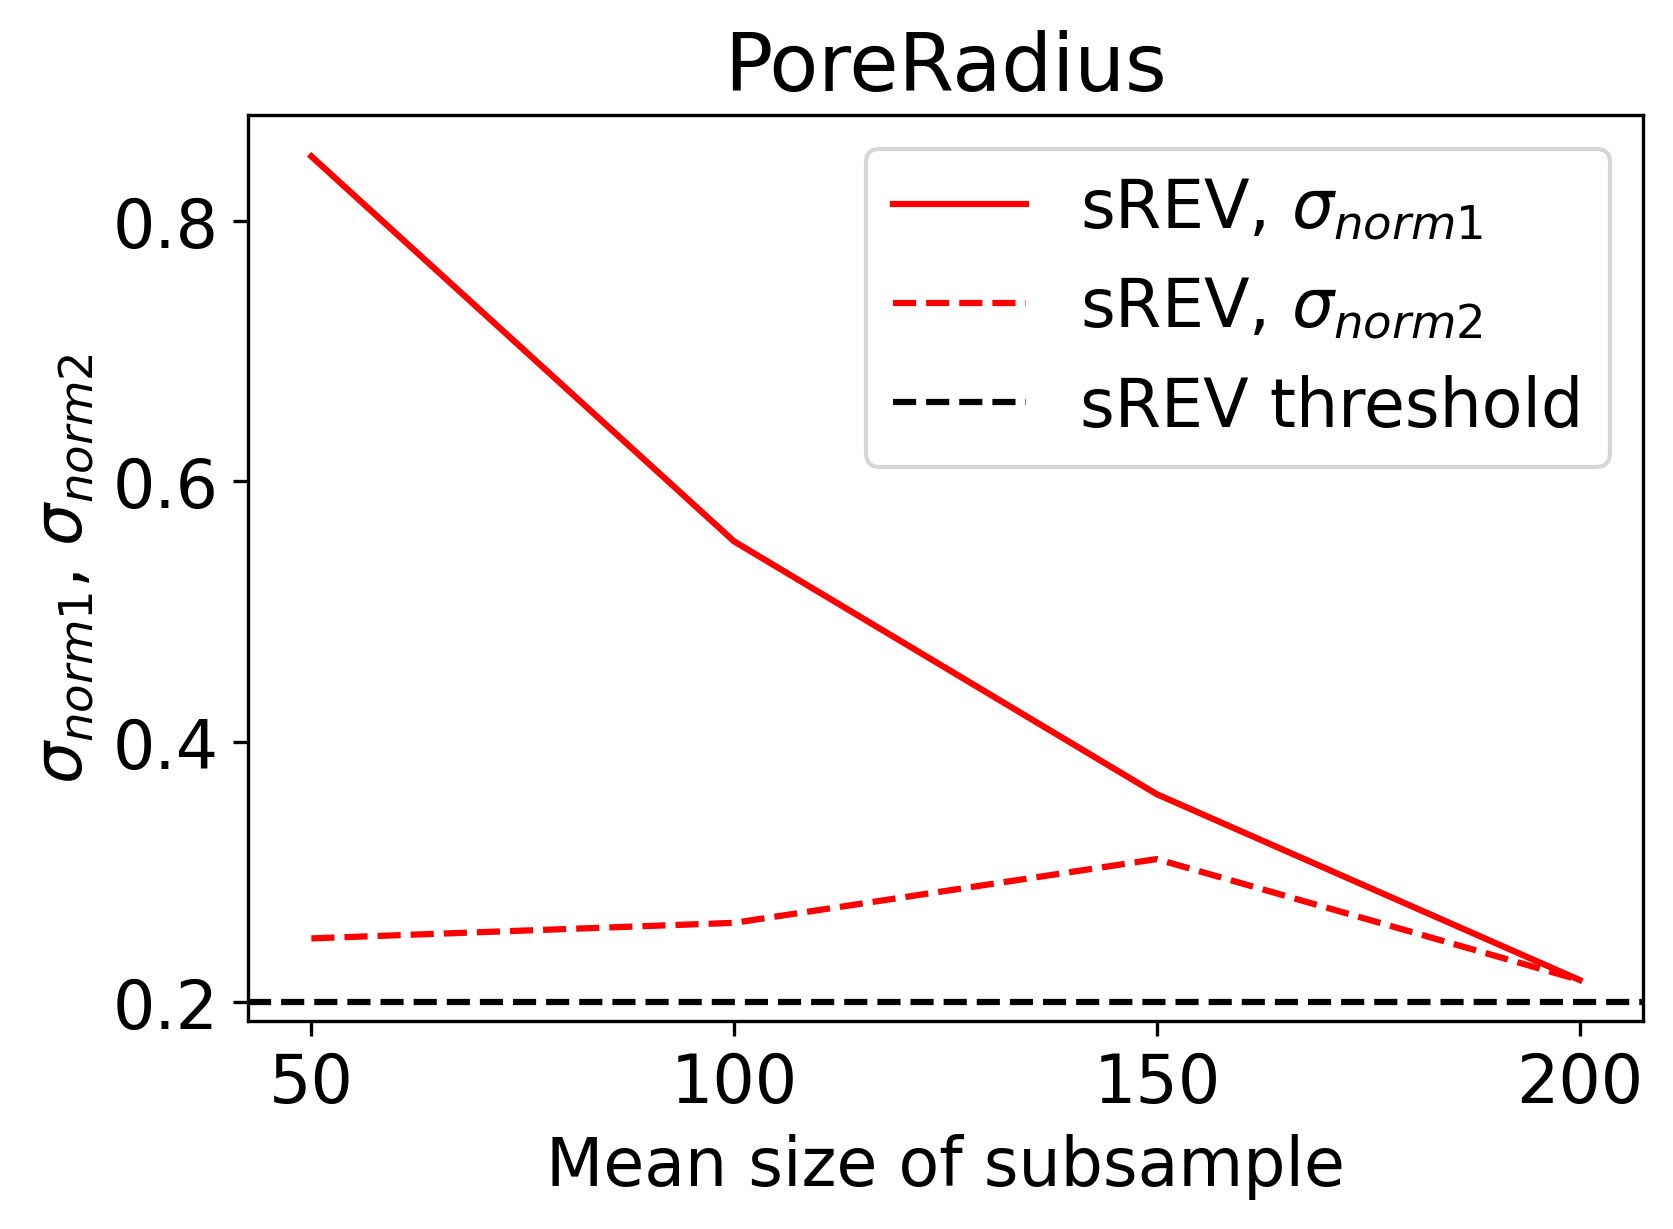

In [15]:
analyzer.show_results()